<a href="https://colab.research.google.com/github/earthtennison/zcure-door/blob/main/euclidean_distance_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


In [ ]:


pickle_file = open("/gdrive/MyDrive/distance_100.pkl", "rb")
objects = []
while True:
    try:
        objects.append(pickle.load(pickle_file))
    except EOFError:
        break
pickle_file.close()

In [ ]:
arr = np.asarray(objects)
arr=np.squeeze(arr)
print(arr.shape)
arr


(72, 98)


array([[ 71.316414, 105.636604, 112.8258  , ..., 119.7504  , 116.81843 ,
        126.34933 ],
       [103.02047 ,  50.07955 , 111.03001 , ..., 110.48653 , 112.876366,
        122.738464],
       [111.6021  , 122.27076 , 104.32199 , ..., 100.63197 ,  97.95291 ,
        109.83254 ],
       ...,
       [112.21945 , 119.816895,  99.41295 , ..., 106.61556 , 102.429214,
        102.66451 ],
       [117.01527 , 121.97504 , 109.06024 , ...,  56.62686 , 107.499916,
        117.77041 ],
       [107.9175  , 116.83113 ,  97.329346, ...,  93.722404,  68.694984,
        115.1194  ]], dtype=float32)

In [ ]:
min_distance = np.asarray([np.min(r) for r in arr])
min_distance

array([71.316414, 50.07955 , 45.38453 , 64.10496 , 73.78868 , 60.388115,
       69.59709 , 56.588985, 68.76392 , 71.84343 , 55.792038, 74.06983 ,
       50.167915, 55.591995, 79.2612  , 49.36796 , 81.47916 , 35.02405 ,
       53.619175, 75.432915, 58.606106, 74.7573  , 62.7691  , 57.510567,
       56.077053, 40.129593, 68.708694, 59.945236, 82.537056, 65.24509 ,
       61.665726, 73.18101 , 78.062874, 54.54859 , 73.68423 , 79.39318 ,
       70.76861 , 44.069767, 54.54259 , 61.629456, 50.76242 , 66.50178 ,
       40.388863, 60.057495, 60.780552, 79.445946, 74.43015 , 80.91649 ,
       72.71756 , 84.09324 , 35.411873, 64.33999 , 73.41898 , 67.73595 ,
       74.09964 , 63.981186, 50.818005, 72.9446  , 64.345566, 82.24169 ,
       61.71571 , 63.70412 , 80.16049 , 76.25954 , 48.332836, 62.988144,
       45.999866, 97.152756, 60.325222, 41.19162 , 56.62686 , 68.694984],
      dtype=float32)

In [ ]:
min_index = np.asarray([np.argmin(r) for r in arr])
print(min_index.shape)
min_index = [(i,min_index[i]) for i in range (len(min_index))]
min_index

(72,)


[(0, 0),
 (1, 1),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (6, 8),
 (7, 9),
 (8, 10),
 (9, 12),
 (10, 13),
 (11, 15),
 (12, 16),
 (13, 17),
 (14, 18),
 (15, 20),
 (16, 23),
 (17, 24),
 (18, 25),
 (19, 26),
 (20, 28),
 (21, 29),
 (22, 31),
 (23, 32),
 (24, 33),
 (25, 36),
 (26, 37),
 (27, 39),
 (28, 40),
 (29, 41),
 (30, 42),
 (31, 43),
 (32, 45),
 (33, 46),
 (34, 47),
 (35, 48),
 (36, 50),
 (37, 51),
 (38, 52),
 (39, 53),
 (40, 54),
 (41, 55),
 (42, 57),
 (43, 58),
 (44, 60),
 (45, 62),
 (46, 63),
 (47, 64),
 (48, 66),
 (49, 67),
 (50, 68),
 (51, 69),
 (52, 70),
 (53, 72),
 (54, 73),
 (55, 75),
 (56, 76),
 (57, 77),
 (58, 78),
 (59, 80),
 (60, 81),
 (61, 83),
 (62, 84),
 (63, 85),
 (64, 87),
 (65, 90),
 (66, 91),
 (67, 92),
 (68, 93),
 (69, 94),
 (70, 95),
 (71, 96)]

In [ ]:
idxs = [i*arr.shape[1]+j for i, j in min_index]
wrong_distance = np.delete(arr,idxs).reshape(72,97)

In [ ]:

wrong_distance.shape

(72, 97)

In [ ]:
mean_wrong_distance = wrong_distance.flatten()
mean_wrong_distance = np.random.choice(mean_wrong_distance,72,replace=False)
mean_wrong_distance.shape

(72,)

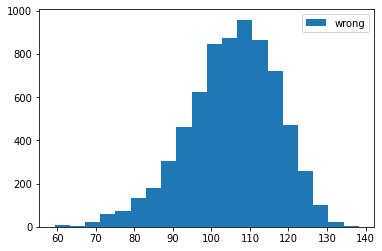

In [ ]:
plt.hist(wrong_distance.flatten(),bins=20,label='wrong')
plt.legend()
plt.show()

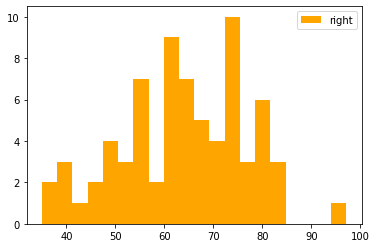

In [ ]:
plt.hist(min_distance,bins=20,label='right',color='orange')
plt.legend()
plt.show()

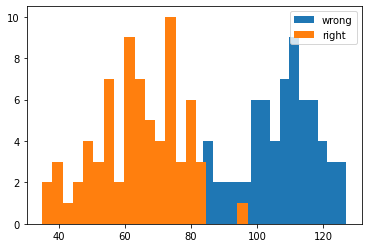

mean wrong: 104.62975
mean right: 63.91775
threshold: 84.27375030517578


In [ ]:
plt.hist(mean_wrong_distance,bins=20,label='wrong')
plt.hist(min_distance,bins=20,label='right')
plt.legend(loc='upper right')
plt.show()
print("mean wrong: "+str(np.mean(mean_wrong_distance)))
print("mean right: "+str(np.mean(min_distance)))
print("threshold: "+str((np.mean(mean_wrong_distance)+np.mean(min_distance))/2))

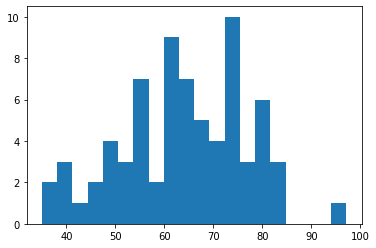

63.91775


In [ ]:
plt.hist(min_distance,bins=20)
plt.show()
print(np.mean(min_distance))